---
title: Results Comparison Across Models
author: "Josh Fernando"
---

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load All Results

We'll load the saved results from all evaluation metrics across different Pegasus LoRA configurations.

In [2]:
# Define model names
model_names = [
    "LoRA-8 Attention",
    "LoRA-16 Attention",
    "LoRA-32 Attention",
    "LoRA-64 Attention",
    "LoRA-8 Attention+FFN",
    "LoRA-16 Attention+FFN",
    "LoRA-32 Attention+FFN",
    "LoRA-64 Attention+FFN"
]

# Data directories
data_dir = Path('../data')
predictions_dir = data_dir / 'predictions'
rouge_dir = data_dir / 'rouge'
classification_dir = data_dir / 'classification'
entailment_dir = data_dir / 'entailment'
identical_dir = data_dir / 'identical_outputs'

### Load Predictions

In [3]:
predictions = {}

for model_name in model_names:
    file_path = predictions_dir / f"Pegasus_{model_name}.csv"
    if file_path.exists():
        predictions[model_name] = pd.read_csv(file_path)
        print(f"Loaded predictions for {model_name}: {len(predictions[model_name])} samples")
    else:
        print(f"Warning: {file_path} not found")

print(f"\nTotal models loaded: {len(predictions)}")

Loaded predictions for LoRA-8 Attention: 64 samples
Loaded predictions for LoRA-16 Attention: 64 samples
Loaded predictions for LoRA-32 Attention: 64 samples
Loaded predictions for LoRA-64 Attention: 64 samples
Loaded predictions for LoRA-8 Attention+FFN: 64 samples
Loaded predictions for LoRA-16 Attention+FFN: 64 samples
Loaded predictions for LoRA-32 Attention+FFN: 64 samples
Loaded predictions for LoRA-64 Attention+FFN: 64 samples

Total models loaded: 8


### Load ROUGE Scores

In [4]:
rouge_scores = {}

for model_name in model_names:
    file_path = rouge_dir / f"Pegasus_{model_name}.csv"
    if file_path.exists():
        rouge_scores[model_name] = pd.read_csv(file_path)
        print(f"Loaded ROUGE scores for {model_name}")
    else:
        print(f"Warning: {file_path} not found")

print(f"\nTotal models loaded: {len(rouge_scores)}")

Loaded ROUGE scores for LoRA-8 Attention
Loaded ROUGE scores for LoRA-16 Attention
Loaded ROUGE scores for LoRA-32 Attention
Loaded ROUGE scores for LoRA-64 Attention
Loaded ROUGE scores for LoRA-8 Attention+FFN
Loaded ROUGE scores for LoRA-16 Attention+FFN
Loaded ROUGE scores for LoRA-32 Attention+FFN
Loaded ROUGE scores for LoRA-64 Attention+FFN

Total models loaded: 8


### Load Classification Scores

In [5]:
classification_scores = {}

for model_name in model_names:
    file_path = classification_dir / f"Pegasus_{model_name}.csv"
    if file_path.exists():
        df = pd.read_csv(file_path, index_col=0)
        classification_scores[model_name] = df
        print(f"Loaded classification scores for {model_name}")
    else:
        print(f"Warning: {file_path} not found")

print(f"\nTotal models loaded: {len(classification_scores)}")

Loaded classification scores for LoRA-8 Attention
Loaded classification scores for LoRA-16 Attention
Loaded classification scores for LoRA-32 Attention
Loaded classification scores for LoRA-64 Attention
Loaded classification scores for LoRA-8 Attention+FFN
Loaded classification scores for LoRA-16 Attention+FFN
Loaded classification scores for LoRA-32 Attention+FFN
Loaded classification scores for LoRA-64 Attention+FFN

Total models loaded: 8


### Load Entailment Scores

In [6]:
entailment_scores = {}

for model_name in model_names:
    file_path = entailment_dir / f"Pegasus_{model_name}.csv"
    if file_path.exists():
        df = pd.read_csv(file_path, index_col=0)
        entailment_scores[model_name] = df
        print(f"Loaded entailment scores for {model_name}")
    else:
        print(f"Warning: {file_path} not found")

print(f"\nTotal models loaded: {len(entailment_scores)}")

Loaded entailment scores for LoRA-8 Attention
Loaded entailment scores for LoRA-16 Attention
Loaded entailment scores for LoRA-32 Attention
Loaded entailment scores for LoRA-64 Attention
Loaded entailment scores for LoRA-8 Attention+FFN
Loaded entailment scores for LoRA-16 Attention+FFN
Loaded entailment scores for LoRA-32 Attention+FFN
Loaded entailment scores for LoRA-64 Attention+FFN

Total models loaded: 8


### Load Identical Output Scores

In [7]:
identical_scores = {}

for model_name in model_names:
    file_path = identical_dir / f"Pegasus_{model_name}.csv"
    if file_path.exists():
        df = pd.read_csv(file_path, index_col=0)
        identical_scores[model_name] = df
        print(f"Loaded identical output scores for {model_name}")
    else:
        print(f"Warning: {file_path} not found")

print(f"\nTotal models loaded: {len(identical_scores)}")

Loaded identical output scores for LoRA-8 Attention
Loaded identical output scores for LoRA-16 Attention
Loaded identical output scores for LoRA-32 Attention
Loaded identical output scores for LoRA-64 Attention
Loaded identical output scores for LoRA-8 Attention+FFN
Loaded identical output scores for LoRA-16 Attention+FFN
Loaded identical output scores for LoRA-32 Attention+FFN
Loaded identical output scores for LoRA-64 Attention+FFN

Total models loaded: 8


## ROUGE Score Comparison

Compare ROUGE scores across all models for different generation scenarios.

In [8]:
# Create a comprehensive ROUGE comparison table
rouge_comparison = []

for model_name in model_names:
    if model_name in rouge_scores:
        df = rouge_scores[model_name]
        for idx, row in df.iterrows():
            rouge_comparison.append({
                'Model': model_name,
                'Comparison': df.index[idx],
                'ROUGE-1': row['rouge_1'],
                'ROUGE-2': row['rouge_2'],
                'ROUGE-L': row['rouge_L'],
                'ROUGE-Lsum': row['rouge_Lsum']
            })

rouge_comparison_df = pd.DataFrame(rouge_comparison)
print("ROUGE Score Comparison:")
print(rouge_comparison_df.to_string())

ROUGE Score Comparison:
                    Model  Comparison   ROUGE-1   ROUGE-2   ROUGE-L  ROUGE-Lsum
0        LoRA-8 Attention           0  0.459236  0.245609  0.425969    0.427389
1        LoRA-8 Attention           1  0.319204  0.108640  0.283047    0.283621
2        LoRA-8 Attention           2  0.382179  0.194311  0.335671    0.335815
3        LoRA-8 Attention           3  0.287172  0.089515  0.238807    0.237074
4       LoRA-16 Attention           0  0.463840  0.249061  0.433509    0.435284
5       LoRA-16 Attention           1  0.365385  0.132696  0.325602    0.324702
6       LoRA-16 Attention           2  0.388564  0.199440  0.343753    0.344763
7       LoRA-16 Attention           3  0.287029  0.090685  0.242049    0.240389
8       LoRA-32 Attention           0  0.460844  0.252199  0.432494    0.432039
9       LoRA-32 Attention           1  0.361457  0.150549  0.327072    0.326017
10      LoRA-32 Attention           2  0.405470  0.213391  0.362667    0.363527
11      LoRA-32 

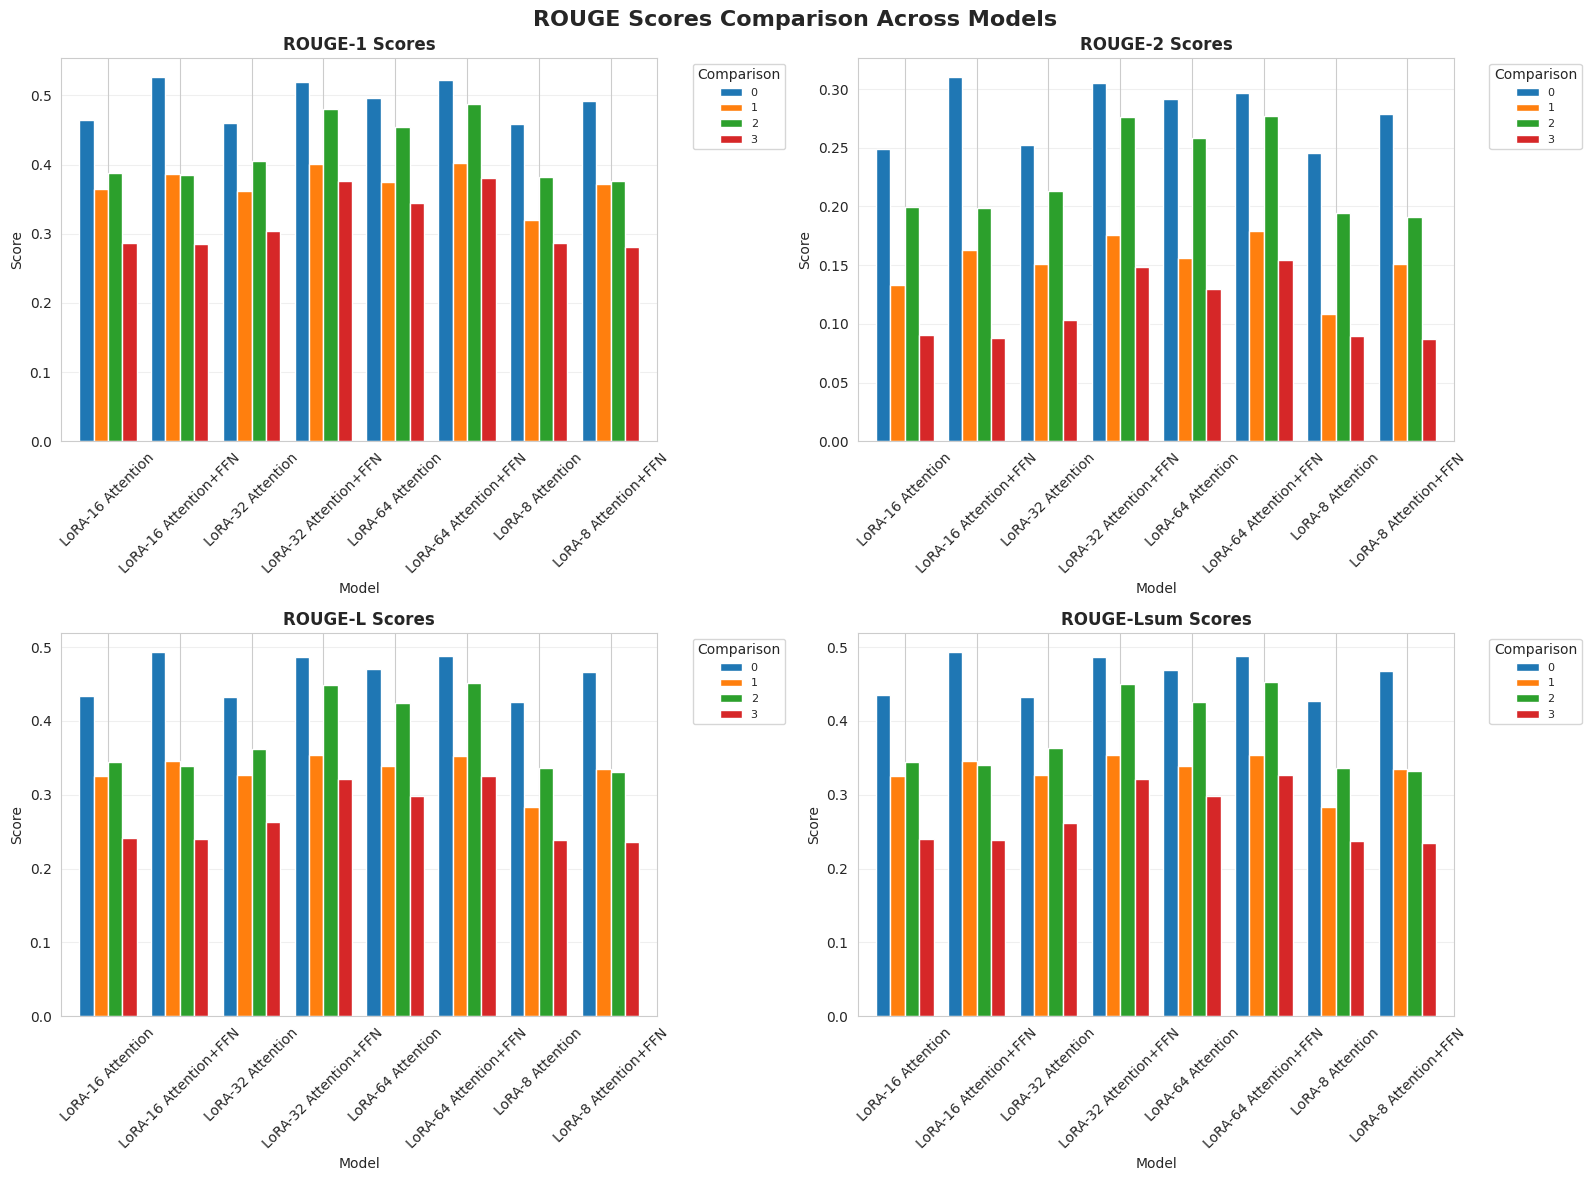

In [9]:
# Visualize ROUGE-1 scores by model and comparison type
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ROUGE Scores Comparison Across Models', fontsize=16, fontweight='bold')

rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']

for idx, metric in enumerate(rouge_metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Pivot data for easier plotting
    pivot_data = rouge_comparison_df.pivot_table(
        index='Model', 
        columns='Comparison', 
        values=metric
    )
    
    pivot_data.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'{metric} Scores', fontsize=12, fontweight='bold')
    ax.set_xlabel('Model', fontsize=10)
    ax.set_ylabel('Score', fontsize=10)
    ax.legend(title='Comparison', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Classification Accuracy Comparison

Compare style classification accuracy across models.

In [10]:
# Create classification comparison table
classification_comparison = []

for model_name in model_names:
    if model_name in classification_scores:
        df = classification_scores[model_name]
        for style_type in df.index:
            classification_comparison.append({
                'Model': model_name,
                'Style': style_type,
                'Accuracy': df.loc[style_type, 'Accuracy'],
                'Neutral %': df.loc[style_type, 'Neutral_Pct'] * 100,
                'Punchy %': df.loc[style_type, 'Punchy_Pct'] * 100
            })

classification_comparison_df = pd.DataFrame(classification_comparison)
print("Classification Accuracy Comparison:")
print(classification_comparison_df.to_string())

Classification Accuracy Comparison:
                    Model      Style  Accuracy  Neutral %  Punchy %
0        LoRA-8 Attention  <NEUTRAL>  0.703125    70.3125   29.6875
1        LoRA-8 Attention   <PUNCHY>  0.265625    73.4375   26.5625
2        LoRA-8 Attention   Baseline       NaN    76.5625   23.4375
3       LoRA-16 Attention  <NEUTRAL>  0.718750    71.8750   28.1250
4       LoRA-16 Attention   <PUNCHY>  0.281250    71.8750   28.1250
5       LoRA-16 Attention   Baseline       NaN    75.0000   25.0000
6       LoRA-32 Attention  <NEUTRAL>  0.671875    67.1875   32.8125
7       LoRA-32 Attention   <PUNCHY>  0.281250    71.8750   28.1250
8       LoRA-32 Attention   Baseline       NaN    70.3125   29.6875
9       LoRA-64 Attention  <NEUTRAL>  0.671875    67.1875   32.8125
10      LoRA-64 Attention   <PUNCHY>  0.281250    71.8750   28.1250
11      LoRA-64 Attention   Baseline       NaN    78.1250   21.8750
12   LoRA-8 Attention+FFN  <NEUTRAL>  0.671875    67.1875   32.8125
13   LoRA-8 

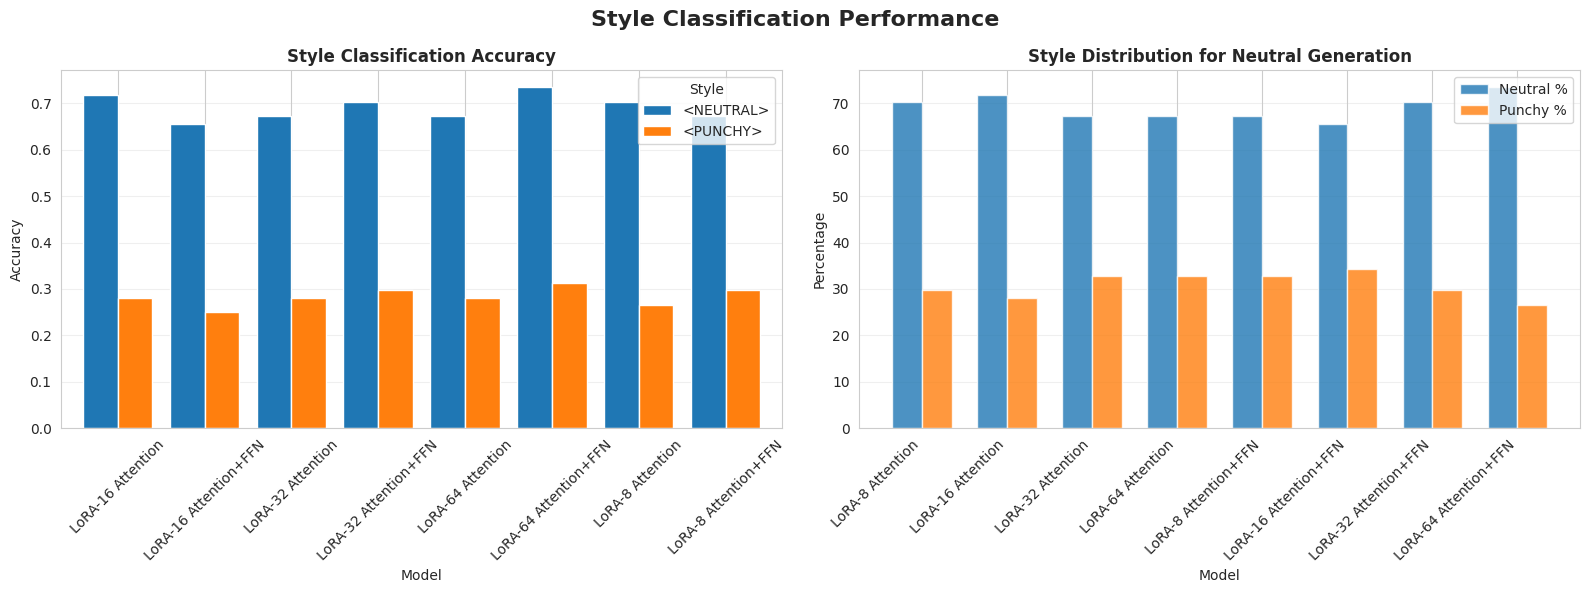

In [11]:
# Visualize classification accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Style Classification Performance', fontsize=16, fontweight='bold')

# Filter out baseline (no accuracy metric)
style_controlled = classification_comparison_df[classification_comparison_df['Style'] != 'Baseline'].copy()

# Plot 1: Accuracy by style
if not style_controlled.empty:
    pivot_acc = style_controlled.pivot_table(index='Model', columns='Style', values='Accuracy')
    pivot_acc.plot(kind='bar', ax=axes[0], width=0.8)
    axes[0].set_title('Style Classification Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Model', fontsize=10)
    axes[0].set_ylabel('Accuracy', fontsize=10)
    axes[0].legend(title='Style')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Style distribution for neutral generation
neutral_style = classification_comparison_df[classification_comparison_df['Style'] == '<NEUTRAL>'].copy()
if not neutral_style.empty:
    x = np.arange(len(neutral_style))
    width = 0.35
    
    axes[1].bar(x - width/2, neutral_style['Neutral %'], width, label='Neutral %', alpha=0.8)
    axes[1].bar(x + width/2, neutral_style['Punchy %'], width, label='Punchy %', alpha=0.8)
    
    axes[1].set_title('Style Distribution for Neutral Generation', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Model', fontsize=10)
    axes[1].set_ylabel('Percentage', fontsize=10)
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(neutral_style['Model'], rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Entailment Score Comparison

Compare factuality (entailment) scores across models.

In [12]:
# Create entailment comparison table
entailment_comparison = []

for model_name in model_names:
    if model_name in entailment_scores:
        df = entailment_scores[model_name]
        for style_type in df.index:
            entailment_comparison.append({
                'Model': model_name,
                'Generation Type': style_type,
                'Avg Entailment Score': df.loc[style_type, 'Avg_Entailment_Score']
            })

entailment_comparison_df = pd.DataFrame(entailment_comparison)
print("Entailment Score Comparison:")
print(entailment_comparison_df.to_string())

Entailment Score Comparison:
                    Model Generation Type  Avg Entailment Score
0        LoRA-8 Attention       <NEUTRAL>              0.904065
1        LoRA-8 Attention        <PUNCHY>              0.921719
2        LoRA-8 Attention        Baseline              0.975791
3       LoRA-16 Attention       <NEUTRAL>              0.934080
4       LoRA-16 Attention        <PUNCHY>              0.936119
5       LoRA-16 Attention        Baseline              0.975055
6       LoRA-32 Attention       <NEUTRAL>              0.952772
7       LoRA-32 Attention        <PUNCHY>              0.909353
8       LoRA-32 Attention        Baseline              0.974967
9       LoRA-64 Attention       <NEUTRAL>              0.898587
10      LoRA-64 Attention        <PUNCHY>              0.915000
11      LoRA-64 Attention        Baseline              0.956253
12   LoRA-8 Attention+FFN       <NEUTRAL>              0.953094
13   LoRA-8 Attention+FFN        <PUNCHY>              0.938329
14   LoRA-8

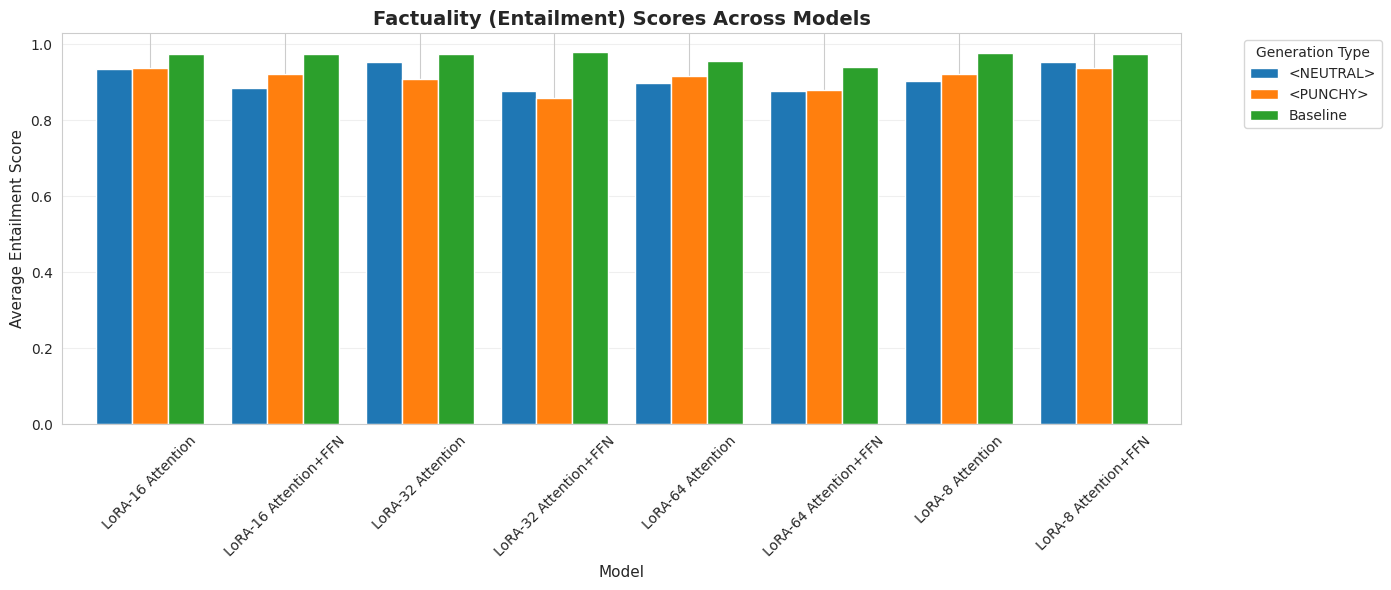

In [13]:
# Visualize entailment scores
fig, ax = plt.subplots(figsize=(14, 6))

pivot_entail = entailment_comparison_df.pivot_table(
    index='Model', 
    columns='Generation Type', 
    values='Avg Entailment Score'
)

pivot_entail.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Factuality (Entailment) Scores Across Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=11)
ax.set_ylabel('Average Entailment Score', fontsize=11)
ax.legend(title='Generation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Identical Outputs Comparison

Compare the percentage of identical outputs between neutral and punchy generations.

In [14]:
# Create identical outputs comparison table
identical_comparison = []

for model_name in model_names:
    if model_name in identical_scores:
        df = identical_scores[model_name]
        identical_comparison.append({
            'Model': model_name,
            'Identical Count': df.loc['Identical Outputs', 'Count'],
            'Total': df.loc['Identical Outputs', 'Total'],
            'Percentage': df.loc['Identical Outputs', 'Percentage']
        })

identical_comparison_df = pd.DataFrame(identical_comparison)
print("Identical Outputs Comparison:")
print(identical_comparison_df.to_string())

Identical Outputs Comparison:
                   Model  Identical Count  Total  Percentage
0       LoRA-8 Attention               42     64     65.6250
1      LoRA-16 Attention               40     64     62.5000
2      LoRA-32 Attention               41     64     64.0625
3      LoRA-64 Attention               51     64     79.6875
4   LoRA-8 Attention+FFN               44     64     68.7500
5  LoRA-16 Attention+FFN               45     64     70.3125
6  LoRA-32 Attention+FFN               50     64     78.1250
7  LoRA-64 Attention+FFN               48     64     75.0000


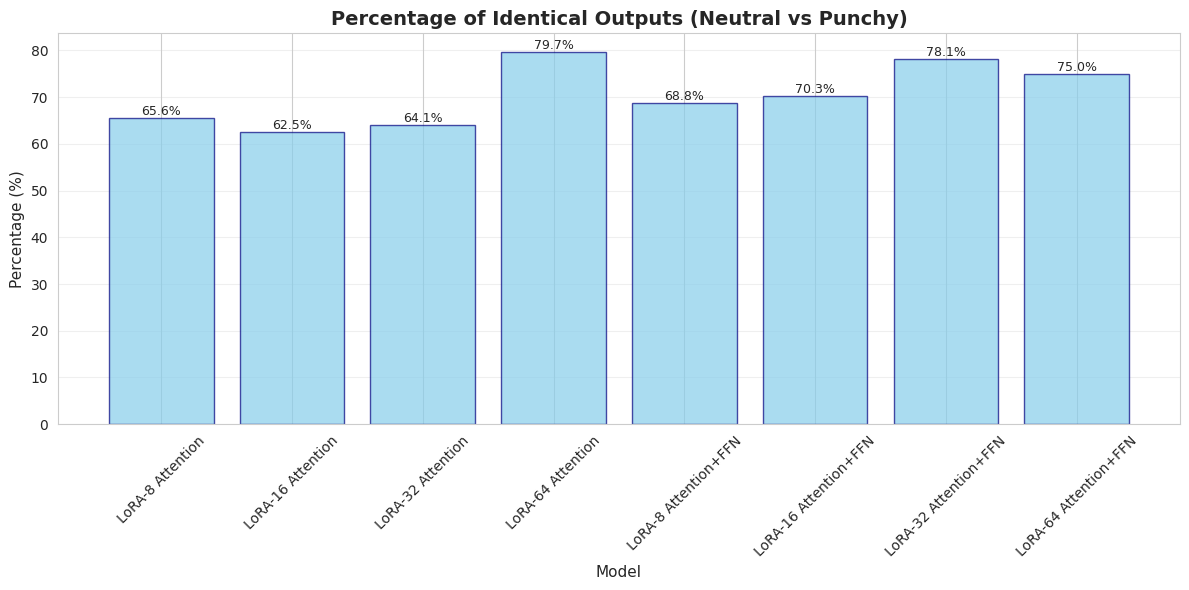

In [15]:
# Visualize identical outputs percentage
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(identical_comparison_df['Model'], identical_comparison_df['Percentage'], 
               color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9)

ax.set_title('Percentage of Identical Outputs (Neutral vs Punchy)', fontsize=14, fontweight='bold')
ax.set_xlabel('Model', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Summary Statistics

Create a comprehensive summary table with key metrics for each model.

In [16]:
# Create summary table
summary_data = []

for model_name in model_names:
    row = {'Model': model_name}
    
    # ROUGE-1 for neutral generation
    if model_name in rouge_scores:
        rouge_df = rouge_scores[model_name]
        # Assuming first row is neutral vs ref_neutral
        row['ROUGE-1 (Neutral)'] = rouge_df.iloc[0]['rouge_1'] if len(rouge_df) > 0 else None
        row['ROUGE-1 (Punchy)'] = rouge_df.iloc[1]['rouge_1'] if len(rouge_df) > 1 else None
    
    # Classification accuracy
    if model_name in classification_scores:
        class_df = classification_scores[model_name]
        if '<NEUTRAL>' in class_df.index:
            row['Neutral Acc'] = class_df.loc['<NEUTRAL>', 'Accuracy']
        if '<PUNCHY>' in class_df.index:
            row['Punchy Acc'] = class_df.loc['<PUNCHY>', 'Accuracy']
    
    # Entailment scores
    if model_name in entailment_scores:
        entail_df = entailment_scores[model_name]
        if '<NEUTRAL>' in entail_df.index:
            row['Entailment (Neutral)'] = entail_df.loc['<NEUTRAL>', 'Avg_Entailment_Score']
        if '<PUNCHY>' in entail_df.index:
            row['Entailment (Punchy)'] = entail_df.loc['<PUNCHY>', 'Avg_Entailment_Score']
    
    # Identical outputs
    if model_name in identical_scores:
        ident_df = identical_scores[model_name]
        row['Identical %'] = ident_df.loc['Identical Outputs', 'Percentage']
    
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*100)
print("COMPREHENSIVE MODEL COMPARISON SUMMARY")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)


COMPREHENSIVE MODEL COMPARISON SUMMARY
                Model  ROUGE-1 (Neutral)  ROUGE-1 (Punchy)  Neutral Acc  Punchy Acc  Entailment (Neutral)  Entailment (Punchy)  Identical %
     LoRA-8 Attention           0.459236          0.319204     0.703125    0.265625              0.904065             0.921719      65.6250
    LoRA-16 Attention           0.463840          0.365385     0.718750    0.281250              0.934080             0.936119      62.5000
    LoRA-32 Attention           0.460844          0.361457     0.671875    0.281250              0.952772             0.909353      64.0625
    LoRA-64 Attention           0.496630          0.374848     0.671875    0.281250              0.898587             0.915000      79.6875
 LoRA-8 Attention+FFN           0.492335          0.371323     0.671875    0.296875              0.953094             0.938329      68.7500
LoRA-16 Attention+FFN           0.527291          0.387029     0.656250    0.250000              0.883952             0.

## Best Model Analysis

Identify the best performing models for different metrics.

In [17]:
print("\nBEST PERFORMING MODELS BY METRIC:")
print("="*80)

# Best ROUGE-1 for neutral
if 'ROUGE-1 (Neutral)' in summary_df.columns:
    best_rouge_neutral = summary_df.loc[summary_df['ROUGE-1 (Neutral)'].idxmax()]
    print(f"\nBest ROUGE-1 (Neutral): {best_rouge_neutral['Model']}")
    print(f"  Score: {best_rouge_neutral['ROUGE-1 (Neutral)']:.4f}")

# Best ROUGE-1 for punchy
if 'ROUGE-1 (Punchy)' in summary_df.columns:
    best_rouge_punchy = summary_df.loc[summary_df['ROUGE-1 (Punchy)'].idxmax()]
    print(f"\nBest ROUGE-1 (Punchy): {best_rouge_punchy['Model']}")
    print(f"  Score: {best_rouge_punchy['ROUGE-1 (Punchy)']:.4f}")

# Best neutral classification accuracy
if 'Neutral Acc' in summary_df.columns:
    best_neutral_acc = summary_df.loc[summary_df['Neutral Acc'].idxmax()]
    print(f"\nBest Neutral Classification Accuracy: {best_neutral_acc['Model']}")
    print(f"  Accuracy: {best_neutral_acc['Neutral Acc']:.4f}")

# Best punchy classification accuracy
if 'Punchy Acc' in summary_df.columns:
    best_punchy_acc = summary_df.loc[summary_df['Punchy Acc'].idxmax()]
    print(f"\nBest Punchy Classification Accuracy: {best_punchy_acc['Model']}")
    print(f"  Accuracy: {best_punchy_acc['Punchy Acc']:.4f}")

# Best entailment (neutral)
if 'Entailment (Neutral)' in summary_df.columns:
    best_entail_neutral = summary_df.loc[summary_df['Entailment (Neutral)'].idxmax()]
    print(f"\nBest Entailment Score (Neutral): {best_entail_neutral['Model']}")
    print(f"  Score: {best_entail_neutral['Entailment (Neutral)']:.4f}")

# Lowest identical outputs (better style control)
if 'Identical %' in summary_df.columns:
    best_diversity = summary_df.loc[summary_df['Identical %'].idxmin()]
    print(f"\nBest Style Diversity (Lowest Identical %): {best_diversity['Model']}")
    print(f"  Identical Outputs: {best_diversity['Identical %']:.2f}%")

print("\n" + "="*80)


BEST PERFORMING MODELS BY METRIC:

Best ROUGE-1 (Neutral): LoRA-16 Attention+FFN
  Score: 0.5273

Best ROUGE-1 (Punchy): LoRA-64 Attention+FFN
  Score: 0.4022

Best Neutral Classification Accuracy: LoRA-64 Attention+FFN
  Accuracy: 0.7344

Best Punchy Classification Accuracy: LoRA-64 Attention+FFN
  Accuracy: 0.3125

Best Entailment Score (Neutral): LoRA-8 Attention+FFN
  Score: 0.9531

Best Style Diversity (Lowest Identical %): LoRA-16 Attention
  Identical Outputs: 62.50%



## Sample Predictions

Display sample predictions from different models for qualitative comparison.

In [18]:
# Show sample predictions from the first model
if len(predictions) > 0:
    sample_model = list(predictions.keys())[0]
    sample_df = predictions[sample_model]
    
    print(f"\nSample Predictions from {sample_model}:")
    print("="*100)
    
    for idx in range(min(3, len(sample_df))):
        row = sample_df.iloc[idx]
        print(f"\nExample {idx + 1}:")
        print("-" * 100)
        print(f"Snippet: {row['snippet'][:200]}..." if len(row['snippet']) > 200 else f"Snippet: {row['snippet']}")
        print(f"\nReference Neutral: {row['ref_neutral']}")
        print(f"Generated Neutral: {row['gen_neutral']}")
        print(f"\nReference Punchy: {row['ref_punchy']}")
        print(f"Generated Punchy: {row['gen_punchy']}")
        print(f"\nBaseline: {row['gen_baseline']}")
        print("-" * 100)


Sample Predictions from LoRA-8 Attention:

Example 1:
----------------------------------------------------------------------------------------------------
Snippet: By the time he stepped down from the country’s top post in 2022, former president Rodrigo Duterte’s declared net worth stood at P37.305 million, making him P13.225 million richer than when he assumed ...

Reference Neutral: Former President Duterte's Net Worth Increased by P13.2 Million During His Term
Generated Neutral: By the time he stepped down from the country’s top post in 2022, former president Rodrigo Duterte’s declared net worth stood at P37.305 million, making him P13.225 million richer than when he assumed office in 2016, according to his statements of assets, liabilities and net worth (SALNs) obtained by

Reference Punchy: P13.2M Richer: Duterte's Net Worth Jumps After Term
Generated Punchy: By the time he stepped down from the country’s top post in 2022, former president Rodrigo Duterte’s declared net worth sto

## Export Summary

Save the summary table for future reference.

In [19]:
# Save summary to CSV
summary_output_path = data_dir / 'model_comparison_summary.csv'
summary_df.to_csv(summary_output_path, index=False)
print(f"\nSummary table saved to: {summary_output_path}")


Summary table saved to: ../data/model_comparison_summary.csv
